In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
trump_dat = pandas.read_json('./trumptweets.json')
trump_dat.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,"Wow, that would be big. Always heard Jeff is v...",2019-12-15 05:40:36+00:00,11142,47210,0.0,1206086633428332544
1,Twitter for iPhone,Thank you for your honesty Jeff. All of the De...,2019-12-15 05:26:15+00:00,16046,62566,0.0,1206083025018277888
2,Twitter for iPhone,I will see Navy at the White House to present ...,2019-12-15 05:10:54+00:00,9187,43770,0.0,1206079160923369472
3,Twitter for iPhone,"Incredible young, strong and brilliant people....",2019-12-15 05:05:46+00:00,12331,65020,0.0,1206077867425255424
4,Twitter for iPhone,Congratulations to Tiger and the entire U.S. T...,2019-12-15 04:53:55+00:00,14141,76279,0.0,1206074885077897216


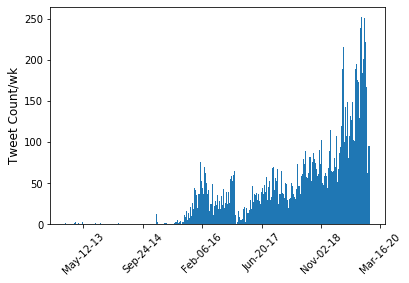

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
d = mdates.date2num(trump_dat['created_at'])
plt.hist(d,bins=range(int(min(d)), int(max(d)) + 7, 7))
myFmt = mdates.DateFormatter('%b-%d-%y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.ylabel('Tweet Count/wk', fontsize=12)
plt.xticks(rotation = 45)
plt.savefig('perweek.png')
plt.show()

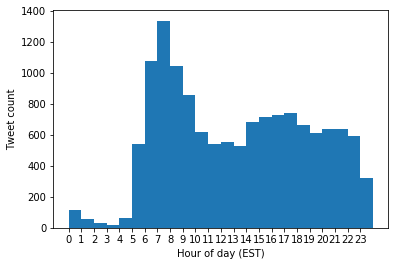

In [3]:
plt.hist(((d-5/24)%1)*24,bins=range(0,25,1))
plt.ylabel('Tweet count')
plt.xlabel('Hour of day (EST)')
plt.xticks(np.arange(0,24,step=1))
plt.savefig('perhour.png')
plt.show()

In [4]:
print('MOST RETWEETED TWEETS\n')
for i in range(5):
    text = trump_dat.sort_values('retweet_count')['text'].iloc[-i-1]
    val = trump_dat.sort_values('retweet_count')['retweet_count'].iloc[-i-1]
    time = trump_dat.sort_values('retweet_count')['created_at'].iloc[-i-1]
    print('Rank {}: Posted on {} ({} retweets)\n {}\n\n'.format((i+1),time,val,text))
print('MOST FAVORITED TWEETS\n')
for i in range(5):
    text = trump_dat.sort_values('favorite_count')['text'].iloc[-i-1]
    val = trump_dat.sort_values('favorite_count')['favorite_count'].iloc[-i-1]
    time = trump_dat.sort_values('favorite_count')['created_at'].iloc[-i-1]
    print('Rank {}: Posted on {} ({} retweets)\n {}\n\n'.format((i+1),time,val,text))

MOST RETWEETED TWEETS

Rank 1: Posted on 2017-07-02 13:21:42+00:00 (369530 retweets)
 #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg


Rank 2: Posted on 2019-08-02 17:41:30+00:00 (251530 retweets)
 A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!


Rank 3: Posted on 2019-07-19 20:01:47+00:00 (210186 retweets)
 Just spoke to @KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved!


Rank 4: Posted on 2019-07-20 11:02:22+00:00 (210171 retweets)
 RT @realDonaldTrump: Just spoke to @KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minist…


Rank 5: Posted on 2019-11-27 15:54:39+00:00 (197398 retweets)
 https://t.co/11nzKwOCtU


MOST FAVORITED TWEETS

Rank 1: Posted on 2019-08-02 17:41:30+00:00 (879647 retweet

In [5]:
tweets = trump_dat['text']
full_text = ''
n_words = np.zeros((len(tweets),1))
n_char = np.zeros((len(tweets),1))
for i in range(len(tweets)):
    full_text = full_text +" "+ tweets[i]
    words = tweets[i].split()
    n_words[i] = len(words)
    n_char[i] = len(tweets[i])

mean words per tweet = 25 
 std = 15
mean characters per tweet = 158 
 std = 79


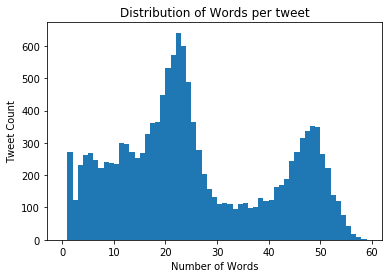

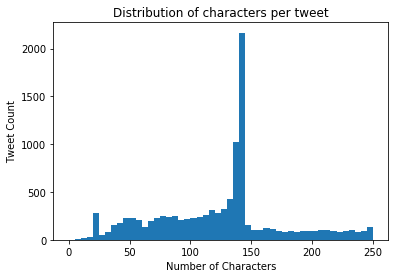

In [6]:
print('mean words per tweet = %.0f \n std = %.0f' % (np.mean(n_words),np.std(n_words)))
print('mean characters per tweet = %.0f \n std = %.0f' % (np.mean(n_char),np.std(n_char)))
plt.hist(n_words,bins=range(0,60,1))
plt.title('Distribution of Words per tweet')
plt.ylabel('Tweet Count')
plt.xlabel('Number of Words')
plt.show()
plt.hist(n_char,bins=range(0,255,5))
plt.title('Distribution of characters per tweet')
plt.ylabel('Tweet Count')
plt.xlabel('Number of Characters')
plt.show()

In [7]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

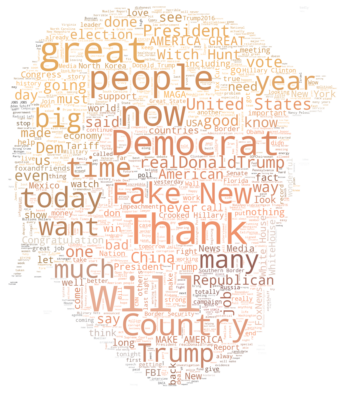

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "RT","amp"])
wordcloud = WordCloud(stopwords=stopwords).generate(full_text)
wordcloud.to_file("./trumpcloud.png")

# Generate a word cloud image
mask = np.array(Image.open("./mask.jpg"))
trumpcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(full_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(trumpcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("./trumpcloud.png", format="png")

plt.show()

source: https://www.datacamp.com/community/tutorials/wordcloud-python